The life of a philosopher consists of an alternation of thinking and eating.

Five philosophers, numbered from 0 through 4 are living in a house where the table laid for them, each philosopher having his own place at the table:

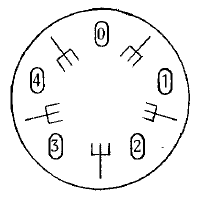

Their only problem - besides those of philosophy - is that the dish served is a very difficult kind of spaghetti, that has to be eaten with two forks. There are two forks next to each plate, so that presents no difficulty: as a consequence, however, no two neighbours may be eating simultaneously.

### User Stories

* As a PHILOSOPHER I want to...
    * think *so I can ask questions and get answers*
    * eat *so I can continue thinking*
    * have acceess to two forks so I can eat

Text in italic is inferred.

### Assumptions

...

### Design Decisions

...

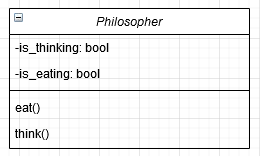